# Heater example

In [3]:
# lets define some recursive sequences
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# imports - libraries and RNN settings
import numpy as np
import matplotlib.pyplot as plt
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
# np.random.seed(2)

# given - build model
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [79]:
# load in data
input_sequence = np.loadtxt('datasets/binary_voltage.csv')
output_sequence = np.loadtxt('datasets/hidden_voltage.csv')

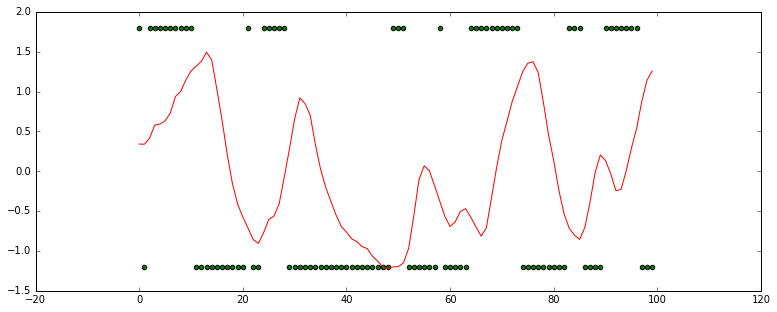

In [88]:
### take subsequences of both, and center
# for sub_sequence binarize to +/-1
num_pts = 100
input_sequence = input_sequence[:num_pts]
input_sequence = (input_sequence - np.mean(input_sequence))

# u = np.unique(input_sequence)
# ind = np.argwhere(input_sequence==u[0])
# ind = [s[0] for s in ind]
# ind2 = np.argwhere(input_sequence==u[1])
# ind2 = [s[0] for s in ind2]
# input_sequence[ind] = -1
# input_sequence[ind2] = 1
# input_sequence.shape = (len(input_sequence),1)

# for hidden just normalize - subtract mean and normalize to lie in range [-1,1]
output_sequence = output_sequence[:num_pts]
output_sequence = (output_sequence - np.mean(output_sequence))
# output_sequence = output_sequence/float(np.abs(np.max(output_sequence)))

# output_sequence.shape = (len(output_sequence),1)

# plot both
# plot original and prediction
fig = plt.figure(figsize = (13,5))
ax = fig.add_subplot(111)
ax.scatter(np.arange(len(input_sequence)),input_sequence,c = 'g')
ax.plot(output_sequence,c = 'r')

## Universal functions for experiments

In [89]:
def window(input_sequence,output_sequence,window_size):
    # containers for input/output pairs
    x = []
    y = []
    
    # window data
    count = 0
    for t in range(len(input_sequence) - window_size):
        # get input sequence
        temp_in = input_sequence[t:t + window_size]
        x.append(temp_in)
        
        # get corresponding target
        temp_target = output_sequence[t + window_size]
        y.append(temp_target)
        count+=1
        
    # reshape each 
    x = np.asarray(x)
    x.shape = (np.shape(x)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),)
    
    return x,y

In [103]:
window_size = 12
x,y = window(input_sequence,output_sequence,window_size)

In [104]:
x = np.reshape(x, (x.shape[0], 1, x.shape[1]))

## Just markov

In [105]:
# imports - libraries and RNN settings
import numpy as np
import matplotlib.pyplot as plt
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Activation

import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
# np.random.seed(2)

# given - build model
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [106]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(1, input_shape=(1, window_size),activation = 'linear'))
# model.add(Dense(1,input_dim = window_size, activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [107]:
# run your model
model.fit(x, y, epochs=500, batch_size=24, verbose=0)

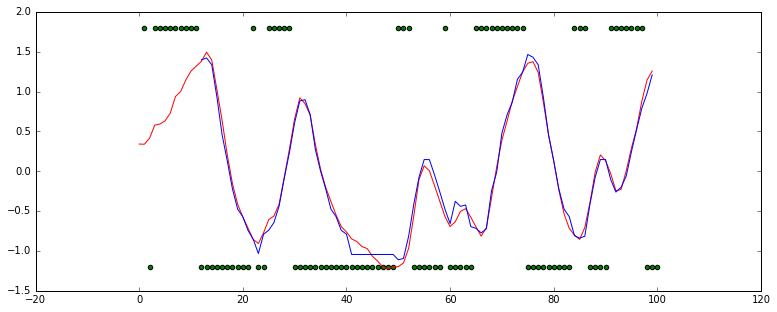

In [108]:
# generate predictions for training
train_predict = model.predict(x)

# plot original and prediction
fig = plt.figure(figsize = (13,5))
ax = fig.add_subplot(111)

ax.plot(output_sequence,c = 'r')
ax.plot(np.arange(len(train_predict))+window_size,train_predict,c = 'b')
ax.scatter(np.arange(len(input_sequence))+1,input_sequence,c = 'g')

In [102]:
y

array([ 0.578055,  0.592655,  0.631755,  0.729455,  0.936955,  1.000455,
        1.144555,  1.256855,  1.317955,  1.378955,  1.493755,  1.396055,
        1.022455,  0.636655,  0.204355, -0.157045, -0.413445, -0.574645,
       -0.713745, -0.855445, -0.906745, -0.772445, -0.606345, -0.562345,
       -0.413445, -0.071545,  0.280055,  0.658655,  0.919955,  0.849055,
        0.702555,  0.336255,  0.026155, -0.203445, -0.379245, -0.550145,
       -0.694245, -0.762645, -0.848145, -0.882245, -0.945745, -0.970245,
       -1.065445, -1.126445, -1.199745, -1.224145, -1.199745, -1.197345,
       -1.150945, -0.967745, -0.557545, -0.103245,  0.067655,  0.006555,
       -0.181445, -0.374345, -0.567245, -0.694245, -0.633245, -0.503745,
       -0.469545, -0.577045, -0.699145, -0.813945, -0.708945, -0.332845,
        0.055455,  0.389955,  0.629355,  0.878355,  1.061555,  1.247155,
        1.354555,  1.374155,  1.239855,  0.866155,  0.455955,  0.133555,
       -0.240045, -0.535545, -0.716245, -0.801745, 